I've learned from the following:
- _An Introduction to the Theory of Numbers_ by Hardy
- _Analytic Number Theory_ by Apostol
- https://wstein.org/ent/ent.pdf
- https://www.akalin.com/intro-primality-testing
- https://math.stackexchange.com/a/2886
- http://drona.csa.iisc.ernet.in/~arpita/Cryptography15/CT8.pdf

# Crash Course into Number Theory

> Mathematics is the queen of the sciences and number theory is the queen of mathematics —Gauss

## Prime numbers

We say that $a$ divides another number $b$ whenever there is another number $c$ such that $bc = a$.

We denote it $a \mid b$, and call $a$ a "divisor" of $b$.

For example, $6 \mid 12$ since $6 \cdot 2 = 12$.

But $7 \not\mid 12$ since there is no such natural number $c$ such that $7c = 12$.

A prime number is a number $p > 1$ whose only divisors are $1$ and itself.

We call numbers that aren't prime, composite.

For example, these are prime: $2, 3, 5, 7, 11, 13$. And these are composite: $4, 6, 8, 9, 10, \ldots, 561$.

Every number has a factorization into primes!

If $n$ is prime, then there's nothing to prove. Otherwise, by definition, $n$ has at least one divisor between $1$ and $n$, inclusive. Choose the least divisor $d$ among them.

We see that $d$ must be prime, for otherwise we would contradict its minimality. Since $k \mid d$ implies $k \mid n$.

We can now proceed recursively until $n$ is completely factored!

Why don't we call $1$ prime? Well, it turns out that every number has a unique factorization into primes!

For example $12 = 2\cdot2\cdot3$, and $561 = 3\cdot11\cdot17$.

And the unique part of that definition relies on $1$ not being prime.

If $1$ was prime then we could have both $12 = 1\cdot2^2\cdot3$ and $12 = 1^2\cdot2^2\cdot3$.

## Simple primality checker

Here's a naive way to test if a number is prime.

In [1]:
def is_prime_naive(n):
    if n < 2:
        return False
    
    for d in range(2, n):        
        if n % d == 0:
            return False
        
    return True

In [2]:
[n for n in range(2, 32)
 if is_prime_naive(n)]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]

In [3]:
%time _ = [is_prime_naive(n) for n in range(1, 10**4)]

CPU times: user 641 ms, sys: 9.12 ms, total: 650 ms
Wall time: 686 ms


Hmm.. We can actually be clever here!

What's the largest possible divisor $d$ of $n$ we could reach in the loop?

If we had that, then we could write:

In [4]:
def is_prime_faster(n, largest_divisor):
    if n < 2:
        return False
    
    for d in range(2, largest_divisor + 1):
        if n % d == 0:
            return False
        
    return True

Well, the smallest divisor $d \ge 2$ certainly yields the largest divisor as its quotient, $d\cdot D = n$.

But $D \equiv 0 \pmod n$ implies $d \equiv 0 \pmod n$, so that in the loop we would have first returned `False` before ever reaching $D$.

And similarly the next largest and next smallest divisor fall prey to the same early stop. And so on, until we meet at $d = D$, or $d = \sqrt{n}$.

So, the largest divisor of $n$ is at most $\sqrt{n}$.

In [5]:
from math import sqrt

def is_prime_faster(n):
    if n < 2 or n % 2 == 0:
        return False
    
    for d in range(3, int(sqrt(n)) + 1, 2):
        if n % d == 0:
            return False
    return True

In [6]:
%time _ = [is_prime_faster(n) for n in range(2, 10**4)]

CPU times: user 10.7 ms, sys: 1.13 ms, total: 11.8 ms
Wall time: 11.7 ms


## Distribution of primes

How are the primes distributed? Are they more bunched up in some areas rather than others?

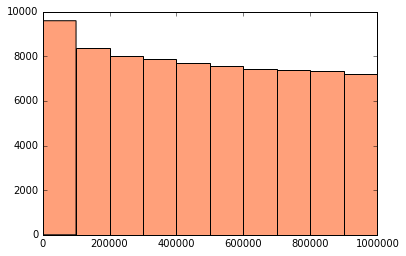

In [7]:
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline

primes = [n for n in range(2, 10**6) if is_prime_faster(n)]
plt.hist(primes, color='lightsalmon')
plt.show()

In fact, it turns out that for any interval $[1, n]$ about $n / \log n$ of them are prime. This is called the prime number of theorem.

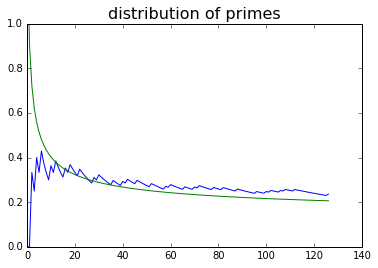

In [8]:
from math import log

props = []
limit = []
num_prime = 0
for n in range(1, 128):
    if is_prime_faster(n):
        num_prime += 1
    props.append(num_prime / n)
    limit.append(1 / log(n + 1))

plt.plot(props)
plt.plot(limit)
plt.ylim(0, 1)
plt.title('distribution of primes', fontsize=16)
plt.show()

# Unique Representation of Primes

*Lemma 1*: If $p$ is prime and $p \mid ab$, then either $p \mid a$ or $p \mid b$.

We can prove this with the Euclidean algorithm. For now, we elide it for clarity, and assume the lemma.

*Theorem 2:* Every number has a unique factorization into primes.

Suppose there exist two unique factorizations for some number

$$a = p_1^{a_1}p_2^{a_2} \cdots p_n^{a_n} =  q_1^{b_1}q_2^{b_2} \cdots q_k^{b_k}$$

Since every $p_i \mid a$, we have $p_i \mid q_1^{b_1} \cdots q_k^{b_k}$ for every $i$, and similarly $q_j \mid p_1^{a_1} \cdots p_n^{a_n}$ for every $j$.

Since primes certainly can't divide each other, by *Lemma 1* we have that each $p$ must divide some and specifically one $q$. In this way for every $p$ there is some corresponding $q$, and conversely so. So, $n = k$.

We have now shown that their primes are the same. Let's now consider what would happen if the powers were different! Suppose some $a_i \ne b_j$. Without loss of generality we can say $a_i < b_i$.

$$\frac{a}{p_i^{a_i}} =  p_1^{b_n} \cdots p_i^{b_i - a_i} \cdots p_n^{b_n} = p_1^{a_1} \cdots p_{i-1}^{a_{i-1}}p_{i+1}^{a_{i+1}}  \cdots p_m^{a_m} $$

So that $p_i$ divides one but not the other. This is a contradiction.

This is called the fundamental theorem of arithmetic.

We can now see why we don't allow $1$ to be a prime. If it was, then one could use any exponent, and so have "different" factorizations for any natural number. So, we consider to be the first prime $2$.

Since we know that primes have exactly one factorization, if we have any "correct" factorizer function, we know that we have found "the" factorization for the number, regardless of how we found it.

Let's write a function that factorizes for us.

In [9]:
from collections import Counter

def factorize(n):
    factors = Counter()
    
    for d in range(2, int(sqrt(n)) + 1):
        while n % d == 0:
            n //= d
            factors[d] += 1
            
    if n > 1:
        factors[n] += 1

    return factors

In [10]:
factorize(561)

Counter({3: 1, 11: 1, 17: 1})

In [11]:
factorize(1)

Counter()

Interestingly, we can see that we can represent natural numbers on a infinite dimensional vector space.

So that $561 = (0, 1, 0, 0, 1, 0, 0, 1, \ldots)$.

And it follows that primes numbers are those points in this coordinate system within a hyper sphere of radius one around the origin.

And perhaps even more interesting, we can represent rational and some algebraic numbers in this way! In this way,  we are starting on a road toward some hard-core algebraic number theory and Adéle rings. We won't go there now.

As a quick aside into curiosity, let's look at the number of unique factors.

In [47]:
factorize(23791523*7*839*4051)

Counter({7: 2, 839: 2, 4051: 2})

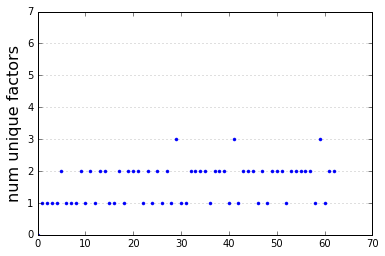

In [12]:
import numpy as np

ns = np.arange(1, 64)
num_unique = [len(factorize(n)) for n in ns]
plt.plot(num_unique, '.')
plt.yticks(range(8))
plt.ylabel('num unique factors', fontsize=16)
plt.grid(True, alpha=0.5, axis='y')
plt.show()

We just started to discover the Hardy–Ramanujan theorem, that the number of unique factors $\omega(n) \to \log \log n$. So that most numbers have the same number of distinct prime factors.

## Coprimes

We can write $n = \prod p^a $ and $k = \prod p^b $, to run through the same set of primes, where some $a$ or $b$ can be $0$.

From this we can see that the greatest common divisor to both $n$ and $k$ is simply $\prod p^{\min(a, b)}$.

And similarly, the least common multiple is $\prod p^{\max(a, b)}$.

For example with $12 = 2^2\cdot3^1$ and $9 = 3^2$, $\mathrm{gcd}(12, 9) = 3^1$, and $\mathrm{lcm}(12, 9) = 2^2\cdot3^2$.

We can then see that $\mathrm{lcm}(n, k) = \frac{n k}{\gcd(n, k)}$, because $a + b - \max(a, b) = \min(a, b)$.

How many divisors does a number have?

Given the factorization for some number $n$, we can construct divisors by using its "bag of primes".

With $n = \prod p^a$, we can choose anywhere from $0$ to $a$, inclusive, for each prime to construct some new divisor $k$.

So, $n$ has $\prod(1 + a)$ divisors

In [48]:
def num_divisors(n):
    factors = factorize(n)
    num = 1
    for a in factors.values():
        num *= (a + 1)
    return num

In [49]:
n = 2018
num_divisors(n)

4

In [15]:
sum(n % d == 0 for d in range(1, n+1))

4

How does the progression on the number of divisors look?

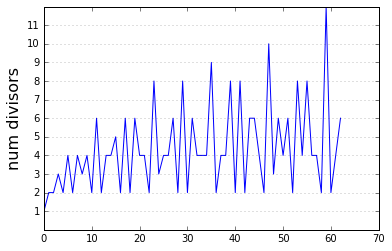

In [16]:
ns = np.arange(1, 64)
num_unique = [num_divisors(n) for n in ns]
plt.plot(num_unique)
plt.yticks(range(1, 12))
plt.ylabel('num divisors', fontsize=16)
plt.grid(True, alpha=0.5, axis='y')
plt.show()

And what about the density of divisors per $n$?

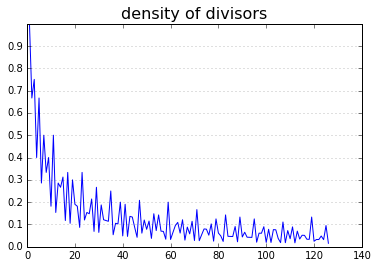

In [17]:
ns = np.arange(1, 128)
num_unique = [num_divisors(n)/n for n in ns]
plt.plot(num_unique)
plt.yticks(np.arange(0, 1, 0.1))
plt.title('density of divisors', fontsize=16)
plt.grid(True, alpha=0.5, axis='y')
plt.show()

We'll consider it a little out of scope, but we can rigorously prove that the number of divisors becomes "almost" vanishingly rare.

We call two numbers coprime whenever $\gcd(a, b) = 1$.

And we denote the number of divisors coprime to some $n$ by the function $\varphi(n)$.

In [18]:
from math import gcd

def coprime(n):
    return [d for d in range(n) if gcd(n, d) == 1]

In [19]:
coprime(16)

[1, 3, 5, 7, 9, 11, 13, 15]

In [20]:
coprime(17)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

*Lemma 3* For all $p$ we have $\varphi(p) = p - 1$, by the definition of being prime.

In [21]:
all(len(coprime(n)) == n - 1
    for n in range(1000)
    if is_prime_faster(n))

True

But it's stranger when considering all numbers:

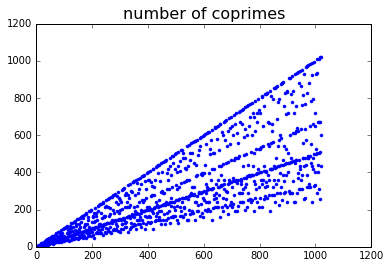

In [22]:
phis = [len(coprime(n)) for n in range(2, 1024)]
plt.plot(phis, '.')
plt.title('number of coprimes', fontsize=16)
plt.show()

Hmm.. What's going on with some of those lines? There's some cool theorems laying dormant in there :)

And what of the density on the number of coprimes? We'll leave out prime numbers for visual clarity.

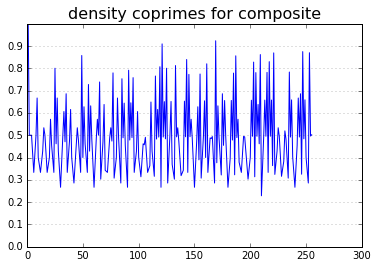

In [23]:
composite = [n for n in range(1, 256) if not is_prime_faster(n)]
num_unique = [len(coprime(n))/n for n in composite]
plt.plot(composite, num_unique)
plt.yticks(np.arange(0, 1, 0.1))
plt.title('density coprimes for composite', fontsize=16)
plt.grid(True, alpha=0.5, axis='y')
plt.show()

# Congruency

We call two numbers congruent $a \equiv b \pmod n$, whenever $n \mid b - a$.

And it so happens we are use congruency all the time!

For example:

- When one says 1:00 PM, another might say 13:00. Together, they say $1 \equiv 13 \pmod{12}$.

- A number $n$ is even whenever $n \equiv 0 \pmod 2$.

- Piano keys rotate over the same notes in different ocaves.

- Days of the week rotate over the same days (usually).

- Checksums just calculate if two functions are congruent some modulus.

If $a \equiv b \pmod n$ we say that $b$ is a residue of $a$ modulus $n$.

There's a "class" of numbers for every "residue". For modulus 2 we have two class of residues: $\{\ldots, -4, -2, 0, 2, 4, \ldots\}$, and $\{\ldots, -5, -3, -1, 1, 3, 5, \ldots\}$.

We can choose a representative for each class. We choose the the smallest non-negative one, and call it the "least residue".

The *complete* set of least residues for 8 would be $\{0, 1, 2, 3, 4, 5, 6, 7\}$.

While we're talking about congruency classes, is there a pattern in the prime residues for some modulus?

In [24]:
print([n % 6 for n in range(2, 32) if is_prime_faster(n)])

[3, 5, 1, 5, 1, 5, 1, 5, 5, 1]


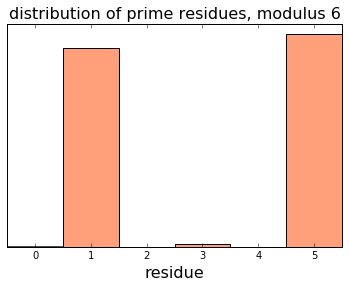

In [25]:
from collections import Counter

def plot_residues(modulus):
    residues = [n % modulus for n in range(2, 1000)
                if is_prime_faster(n)]
    
    plt.hist(residues, bins=range(modulus+1), color='lightsalmon')
    plt.xticks(np.array(range(modulus))+0.5, range(modulus))
    plt.yticks([])
    plt.xlabel('residue', fontsize=16)
    plt.title('distribution of prime residues, modulus {}'.format(modulus),
              fontsize=16)
    plt.show()
    
plot_residues(6)

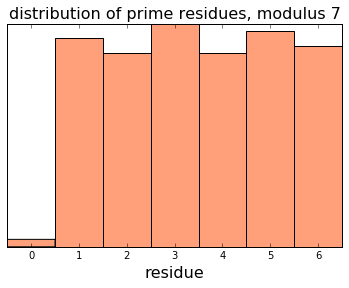

In [26]:
plot_residues(7)

Hmm. Let's plot all the distributions together!

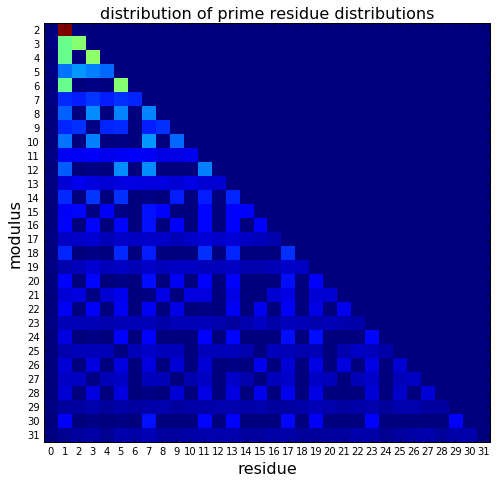

In [53]:
def residue_dist(m, pad):
    mods = Counter(n % m for n in range(2, 1000)
                   if is_prime_faster(n))
    return [mods[n] for n in range(m)] + [0]*(pad - m) 

m = 32
plt.figure(figsize=(8,8))
plt.imshow([residue_dist(a, m) for a in range(2, m)],
           cmap='jet', interpolation='nearest')

plt.yticks(range(m-2), range(2, m))
plt.xticks(range(m))
plt.ylabel('modulus', fontsize=16)
plt.xlabel('residue', fontsize=16)
plt.title('distribution of prime residue distributions', fontsize=16)
plt.show()


## Euler-Fermat Theorem

If $\gcd(k, n) = 1$ and $ka \equiv ka^{\prime} \pmod n$, then $a \equiv a^{\prime} \pmod {n}$.

Why? Well, we have $n \mid k(a - a^{\prime})$. And by *Lemma 1*, we must have $n \mid (a - a^{\prime})$.

Suppose we have a complete set of residues prime to $n$, call that set $R$. This set $R$ has $\varphi(n)$ residues.

*Theorem 4* If we multiple every number in $R$ some $a$ with $\gcd(a, n) = 1$ then $aR$ is a permuation of $R$. 

To show this, consider what would happen if some $ar_i \equiv ar_j \pmod n$. Then $n \mid a(r_i - r_j)$. Since $\gcd(a, n) = 1$, by *Lemma 1*, we must have $n \mid (r_i - r_j)$ or $r_i \equiv r_j \pmod n$. And since our $r_i$ are distinct, we must have $r_i = r_j$ which together proves our theorem.

From this it of course follows that $\prod ar \equiv \prod r \pmod n$ or $a^{\varphi(n)} \prod r \equiv \prod r \pmod n$. Since each $\gcd(r, n) = 1$ by *Lemma 1* we have $a^{\varphi(n)} \equiv 1 \pmod n$.

*Theorem 5* For any $a$ with $\gcd(a, n) = 1$, $a^{\varphi(n)} \equiv 1 \pmod n$.

*Corollary 6* For any prime $p$, $a^{p - 1} \equiv 1 \pmod p$ by *Lemma 3*.

In [28]:
is_prime_faster(773)

True

In [29]:
all(pow(a, 772, 773) == 1 for a in range(1, 773))

True

## Fermat primality test

With this corollary, we can use the contrapositive to test if a number is prime!

That is, if $n$ is prime then $a^{n - 1} \equiv 1 \pmod n$. So if $a^{n - 1} \not\equiv 1 \pmod n$ the $n$ is certainly not prime.

We can draw a random $a$. If $a \mid n$ then clearly $n$ is not prime. Otherwise we test if $a^{n - 1} \not\equiv 1 \pmod n$.

That is, we can construct a "Monte Carlo" algorithm. One that is probably correct, but always fast. In contraposition to a "Las Vegas" algorithm which is always correct, but probably fast.

Whenever we find some $a$, where $a^{n - 1} \not\equiv 1 \pmod n$, we say that $a$ is a "witness" to $n$ being composite.

If $a^{n - 1} \equiv 1 \pmod n$ and $n$ is actually prime, we call $a$ a "liar".

In [30]:
from random import randint

def maybe_witness(n):
    a = randint(2, n - 1)
    return pow(a, n - 1, n) != 1

In [31]:
Counter(maybe_witness(561) for _ in range(10**4))

Counter({False: 5700, True: 4300})

In [32]:
is_prime_faster(561)

False

However we are careful to note that the converse is not true, as demonstrated by the number $561$.

$a^{n - 1} \equiv 1 \pmod n$, then $n$ isn't necessarily prime.

Though, it was thought that the converse was true for a long time.

But there are numbers called Carmichael numbers that have this property for all $a$ with $\gcd(a, n) \equiv 1 \pmod n$.

In [33]:
def is_carmichael(n):
    return all(pow(a, n - 1, n) == 1 for a in coprime(n))

In [34]:
carmichaels = [
    n for n in range(3, 10**4)
    if not is_prime_faster(n) and is_carmichael(n)
]
carmichaels

[561, 1105, 1729, 2465, 2821, 6601, 8911]

Hmm... What's the chance that we'll find a liar?

With more time we could dive into this. But we'll need some algebra under our belts, and that's a discussion unto its own.

To summarize it without going into the details, however, if we assume $n$ isn't a Carmichael number, then there is at least one witness.

If there's at least one witness, then the group of liars forms a subgroup of $\mathbb{Z}^*_n$. By Lagrange's theorem the order of a subgroup divides the group. By supposition this is a strict subgroup. And a corollary of that is that any strict subgroup is at most $1/2$ the size of the full group.

There are 3 important take-aways:

1. Fermat's test is susceptible to Carmichel numbers, if we never find an $a$ such that $\gcd(a, n) > 1$.
2. The probability of of finding a witness for a composite number is at least $1/2$.

So, to test if a number is prime with confidence $\mathtt{conf}$, we have $1 - 2^{-t} = \mathtt{conf}$, so that the number of trials necessary is $t = -\log_2(1 - \mathtt{conf})$ 

In [35]:
from random import randint
from math import log2

def is_prime_fermat(n, trials):    
    for _ in range(trials):
        a = randint(2, n - 1)
        if pow(a, n - 1, n) != 1:
            return False
        
    return True

In [36]:
def fermat_trials(conf):
    return -1 * log2(1 - conf)

In [37]:
fermat_trials(1 - 10**-6)

19.93156856928269

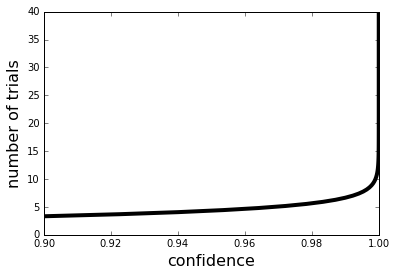

In [38]:
confs = 1 - np.logspace(-12, -1, 100)
trials = [fermat_trials(c) for c in confs]
plt.plot(confs, trials, lw=4, color='black')
plt.xlabel('confidence', fontsize=16)
plt.ylabel('number of trials', fontsize=16)
plt.show()

In [39]:
Counter(is_prime_fermat(561, 4) for _ in range(1000))

Counter({False: 879, True: 121})

In [40]:
Counter(is_prime_fermat(561, 8) for _ in range(1000))

Counter({False: 990, True: 10})

In [41]:
Counter(is_prime_fermat(561, 16) for _ in range(1000))

Counter({False: 999, True: 1})

## Modular exponentiation

Now, it turns out that modular powers are fast _and_ safe to compute!

Consider some $a^k \pmod n$. We can write $k$ in base $2$: $k = \sum x_i 2^i$ where $x \in \{0, 1\}$.

In this way we multiply up from $i = 0$. We square whenever $x_i = 0$ and multiply by $a$ whenever $x_i = 1$.

Or equivalently:

In [42]:
def mod_pow(a, k, n):
    a = a % n
    res = 1
    
    while k > 0:
        if k % 2 == 1:
            res *= a
            res %= n

        a = (a*a) % n
        k //= 2

    return res

In [43]:
mod_pow(13743, 32142348, 561)

438

In [44]:
pow(13743, 32142348, 561)

438

We can see that this takes $\Theta(\log a)$ time :)

## Strong pseudo-primes

So about those pesky Carmichael numbers...

It would be nice if we had a test, that wasn't "susceptible" to them.

Well, there is!

*Lemma 7* For prime $p$, the only solutions to $x^2 \equiv 1 \pmod p$ are $x \pm 1$.

If $x^2 \equiv 1 \pmod p$, then $p \mid x^2 - 1$, and $x^2 - 1 = (x + 1)(x - 1)$. By *Lemma 1*, we have that $p \mid (x - 1)$ or $p \mid (x + 1)$. This proves the lemma.

Suppose $n$ is odd. If it's even then it's clearly not prime unless $n = 2$.

Then we can factor $n - 1 = 2^r u$, where $u$ is odd. That is, "we've factored out as many $2$'s as possible".

So, we start with $r = 0$, and have some $a \equiv b \pmod n$.

If $b \equiv -1$ or $b \equiv 1$ then clearly future powers of $r$ will eventually result in a $1$.

If we have some quadratic residue of $1$ not $1$ or $-1$, then by the contrapositive, $n$ isn't prime!

In [45]:
def is_prime_rabin_miller(n, trials):
    if n == 2:
        return True
    
    r, u = 0, n - 1
    while u % 2 == 0:
        u //= 2
        r += 1
        
    for _ in range(trials):
        a = randint(2, n - 1)
        x = pow(a, u, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                break
            if x == 1:
                return False
        else:
            return False
        
    return True

[n for n in range(4, 32) if is_prime_rabin_miller(n, 8)]

[5, 7, 11, 13, 17, 19, 23, 29, 31]